# Data on Manifolds

## Set up

Before starting this tutorial, we import the visualization module and its parameters.

In [1]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

INFO: Using tensorflow backend


We also import the backend that will be used for geomstats computations.

In [2]:
import geomstats.backend as gs

We set a seed to enable the reproducibility of the results.

In [3]:
gs.random.seed(2020)

We set the working directory to be the root of the geomstats repository. In order to have the code working on your machine, you need to change this path to the path of your geomstats repository.

In [4]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'], 
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /code/geomstats


## From data on linear spaces to data on manifolds

The **science of Statistics** is defined as the collection of data, their analysis and interpretation. Statistical theory is usually defined for data belonging to vector spaces, which are _linear spaces_. For example, we know how to compute the mean of a data set of numbers, like the mean of students' weights in a classroom, or of multidimensional arrays, like the average 3D velocity vector of blood cells in a vessel.

Here is an example of the computation of the mean of two arrays of dimension 2.

In [5]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 2

euclidean = Euclidean(dim=dim)
points_in_linear_space = euclidean.random_uniform(n_samples=n_samples)
print('Points in linear space:\n', points_in_linear_space)

linear_mean = gs.sum(points_in_linear_space, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in linear space:
 tf.Tensor(
[[ 0.5739341   0.95338917]
 [-0.6382277  -0.65808535]], shape=(2, 2), dtype=float32)
Mean of points:
 tf.Tensor([-0.03214681  0.14765191], shape=(2,), dtype=float32)


We plot the points and their mean on the 2D Euclidean space, which is a linear space: a plane.

INFO: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
INFO: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.


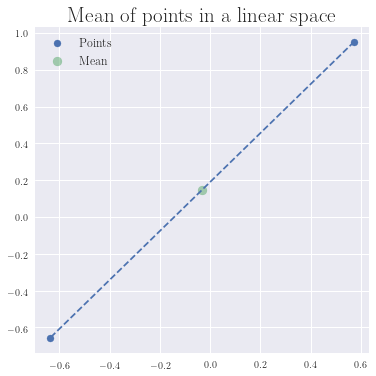

In [6]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1], label='Points')
ax.plot(points_in_linear_space[:, 0], points_in_linear_space[:, 1], linestyle='dashed')

ax.scatter(
    gs.to_numpy(linear_mean[0]), 
    gs.to_numpy(linear_mean[1]), label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points in a linear space')
ax.legend()

What happens to the usual statistical theory when the data doesn't naturally belong to a linear space. For example, if we want to perform statistics on the coordinates of world cities, which lie on the earth: a sphere? 

The non-linear spaces we consider are called manifolds. A **manifold $M$ of dimension $m$** is a space that is allowed to be curved but that looks like a $m$-dimensional vector space in the neighborhood of every point. 

A sphere, like the earth, is a good example of a manifold. We know that the earth is curved, but at our scale we do not see its curvature. Can we still use linear statistics when data are defined on these manifolds, or shall we? 

Let's try.

In [7]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 tf.Tensor(
[[ 0.42310703 -0.67839897 -0.60062903]
 [-0.34749958  0.6196765  -0.7037366 ]], shape=(2, 3), dtype=float32)
Mean of points:
 tf.Tensor([ 0.03780372 -0.02936125 -0.6521828 ], shape=(3,), dtype=float32)


We plot the points and their mean computed with the linear formula.

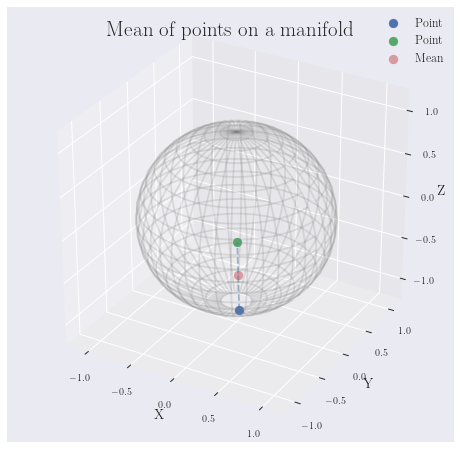

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(
    points_in_manifold, ax=ax, space='S2', label='Point', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend()

What happened? The mean of two points on a manifold (the sphere) is not on the manifold. In our example, the mean city is not on the earth. This leads to errors in statistical computations.

In [9]:
print(sphere.belongs(linear_mean))

tf.Tensor(False, shape=(), dtype=bool)


For this reason, researchers aim to build a theory of statistics that is by construction compatible with any structure we equip the manifold with. This theory is called _Geometric Statistics_.

**Geometric Statistics** is a theory of statistics on manifolds, that takes into account their geometric structures. Geometric Statistics is therefore the child of two major pillars of Mathematics: Geometry and Statistics.

## Examples of data on manifolds

Why should we bother to build a whole new theory of statistics? Do we really have data that belong to spaces like the sphere illustrated in introduction?

Let's see some examples of data spaces that are naturally manifolds. By doing so, we will introduce the `datasets` and `visualization` modules of `geomstats`.

We first import the `datasets.utils` module that allows loading datasets.

In [10]:
import geomstats.datasets.utils as data_utils

### World cities: data on the sphere

We load the dataset `cities`, that contains the coordinates of world cities in spherical coordinates.

In [11]:
data, names = data_utils.load_cities()
print(names[:5])
print(data[:2])

['Tokyo', 'New York', 'Mexico City', 'Mumbai', 'São Paulo']
tf.Tensor(
[[ 0.61993796 -0.5247902   0.58332855]
 [-0.2099432   0.7285533   0.65202296]], shape=(2, 3), dtype=float32)


We convert the spherical coordinates to X, Y, Z coordinates and verify that they belong to the sphere.

In [12]:
gs.all(sphere.belongs(data))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Now, we plot the cities on the sphere. We choose only a subset of the cities that have a nice rendering in the 2D plot of the 3D earth. This plot is nicer shown in an interactive 3D figure.

In [13]:
from geomstats.geometry.matrices import Matrices
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

data, names = data_utils.load_cities()

Text(0.5, 0.92, 'Cities on the earth.')

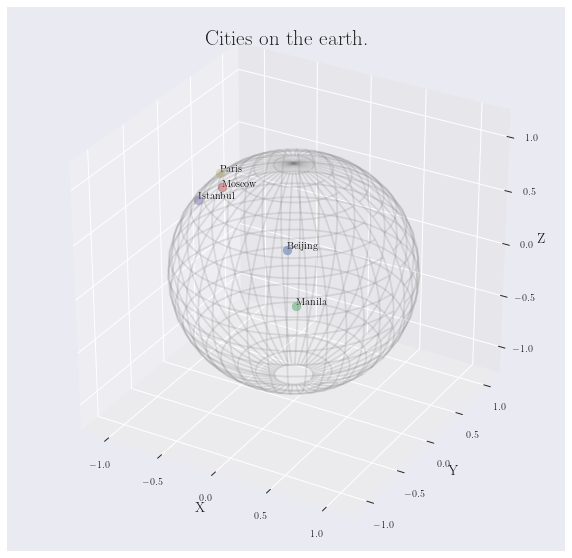

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Cities on the earth.')

### Pose of objects in pictures

We load the dataset `poses`, that contains the 3D poses of objects in images.

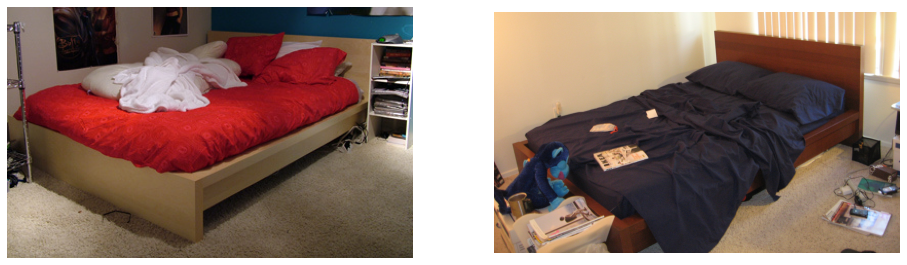

In [15]:
data, img_paths = data_utils.load_poses()

img_path1, img_path2 = img_paths[0], img_paths[1]
img_path1 = os.path.join(data_utils.DATA_FOLDER, 'poses', img_path1)
img_path2 = os.path.join(data_utils.DATA_FOLDER, 'poses', img_path2)

img1 = mpimg.imread(img_path1)
img2 = mpimg.imread(img_path2)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
imgplot = ax.imshow(img1)
ax.axis('off')
ax = fig.add_subplot(122)
imgplot = ax.imshow(img2)
ax.axis('off')

plt.show()

Now we plot the poses of these beds, which correspond to a 3D rotation.

In [16]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

so3 = SpecialOrthogonal(n=3, point_type='vector')

We verify that the poses belong to the space of 3D rotations.

In [17]:
gs.all(so3.belongs(data))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

We plot the orientations of the first 2 beds.

Text(0.5, 0.92, '3D orientations of the beds.')

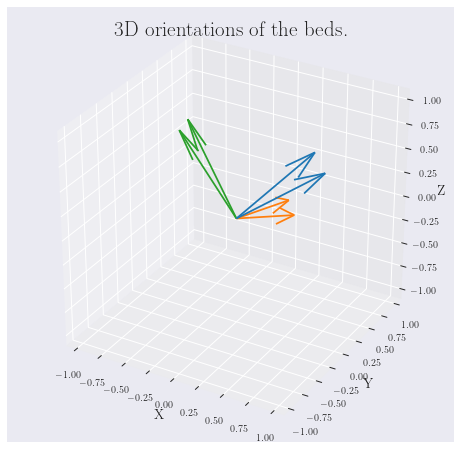

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[:2], ax=ax, space='SO3_GROUP')

ax.set_title('3D orientations of the beds.')

These orientations are very close, as expected from the corresponding images.